## Liberaries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## Load Data

In [3]:
data = pd.read_csv("../data/raw/raw_train_data.csv")

In [55]:
data.head(3)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


## EDA

### Target Distribution

In [46]:
data.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [17]:
data.status_group.value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

Baseline (majority class) = 0.54 accuracy

### Missing data

In [61]:
data.isna().mean().sort_values(ascending=False).head(7).index.values

array(['scheme_name', 'scheme_management', 'installer', 'funder',
       'public_meeting', 'permit', 'subvillage'], dtype=object)

### Distributions of numerical values 

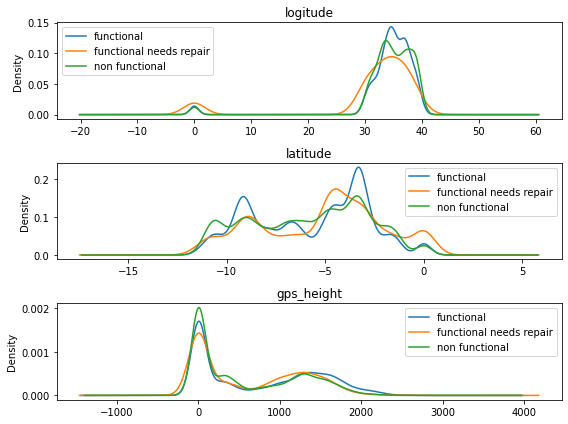

In [45]:
fig, ax = plt.subplots(3,1, figsize=(8, 6))
data.groupby('status_group')['longitude'].plot(kind='kde', legend=True, ax=ax[0], title='logitude')
data.groupby('status_group')['latitude'].plot(kind='kde', legend=True, ax=ax[1], title='latitude')
data.groupby('status_group')['gps_height'].plot(kind='kde', legend=True, ax=ax[2], title='gps_height')
plt.tight_layout();

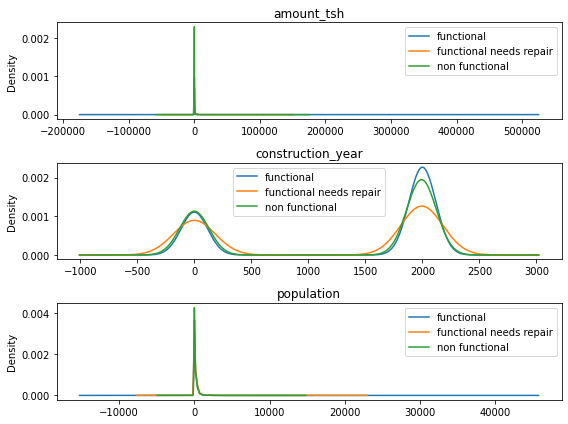

In [63]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))
data.groupby('status_group')['amount_tsh'].plot(kind='kde', legend=True, title='amount_tsh', ax=ax[0])
data.groupby('status_group')['construction_year'].plot(kind='kde', legend=True, title='construction_year', ax=ax[1])
data.groupby('status_group')['population'].plot(kind='kde', legend=True, title='population', ax=ax[2])
plt.tight_layout();

### Unique values

In [53]:
data.nunique().sort_values(ascending=False)

id                       59400
latitude                 57517
longitude                57516
wpt_name                 37400
subvillage               19287
scheme_name               2696
gps_height                2428
installer                 2145
ward                      2092
funder                    1897
population                1049
date_recorded              356
lga                        125
amount_tsh                  98
num_private                 65
construction_year           55
region_code                 27
region                      21
district_code               20
extraction_type             18
extraction_type_group       13
management                  12
scheme_management           12
source                      10
basin                        9
water_quality                8
extraction_type_class        7
waterpoint_type              7
payment                      7
payment_type                 7
source_type                  7
waterpoint_type_group        6
quality_

## Inferences
* categorical features with missing values: 
    * `['scheme_name', 'scheme_management', 'installer', 'funder', 'public_meeting', 'permit', 'subvillage']`
* numerical features with missing values encoded as 0: 
    * `['amount_tsh', 'gps_height', 'longitude', 'latitude', 'construction_year', 'population']`
* categorical features encoded as numerical:
    * `['region_code', 'district_code']`